# Eric Kofoid
# Assignment 1

## I don't like Rstudio, so I figured out how to get the R kernel running in jupyter.

In [118]:
library(fma)
library(zoo)

# QUESTION 2

### Answer to 2a)
Not much can be seen from the basic plot (below). Finding seasonality is difficult because there is no easily seen correlation to calendar days since the frequency is consecutive stock days.

* Trend - I don't observe any trend
* Seasonality - doesn't seem to be any seasonality, but difficult to tell because of the nature of the data
* Cycle - don't really see any cycles

The whole problem with all of this is that we really don't know what time frame this data represents it is just stock days. Also, we don't know what was going on with IBM or the overall market with this data. Is this during a time of huge fluctuation or was the general market very stable during this time? Did IBM have any major announcements during this time?

### Answer to 2b) & 2c)
If we want to just go with this data ignoring that we don't really understand it, then choosing first 300 at first seems to be ok because it includes the huge downward swing.

Visually I would give Drift the best rating because it follows the general direction of the actual data, but it is pretty coincidental. Based on the accuracy numbers, Naive & Seasonal are the best. But there doesn't seem to be any seasonality in this data, so even that isn't a good model.

When we see the results for split of 250/119, it looks terrible.

Criteria I am using to decide which forecasting model has the best fit is purely a visual one. Drift follows the general trend of the actual test set, but I realize this is not the best way to evaluate.

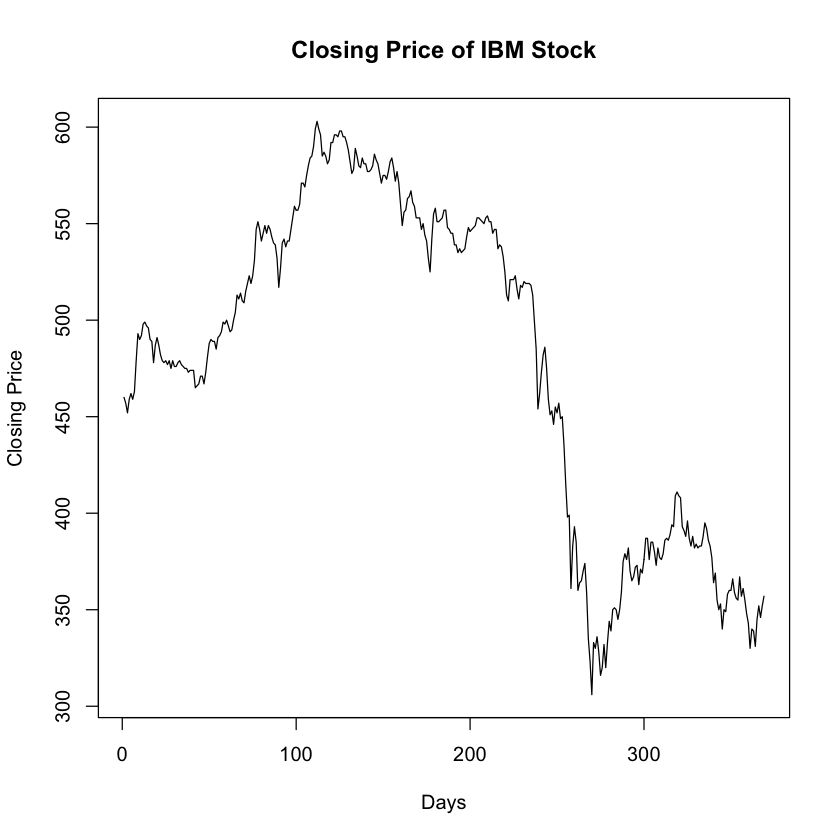

In [4]:
# put data into generic ds variable for reusable code
ds <- ibmclose

plot(ds, main="Closing Price of IBM Stock", xlab="Days", ylab="Closing Price")

### First Lag Plot
The lag plot here plots a stock day against the previous day. It is very linear so I am guessing that this has some sort of signifance that we will learn about. I googled this to see if I could learn about it, I still don't quite understand the significance yet.

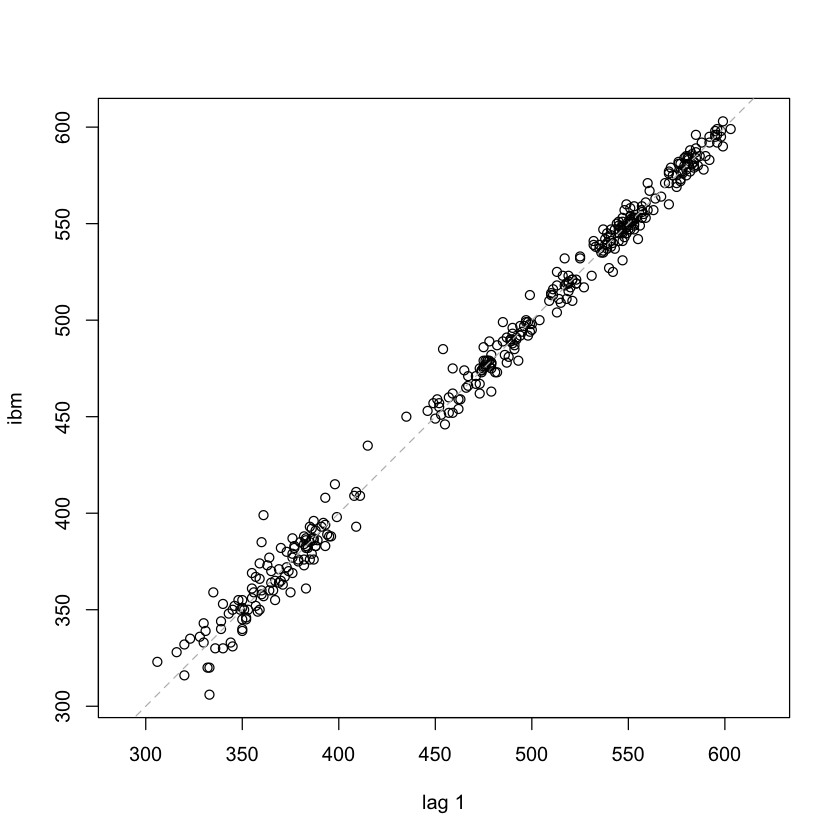

In [10]:
lag.plot(ds, lags=1)

## Splitting & Forecasting

### 2c) for 300/69 split
I want to see what happens with 2 different splits, this is the first which follows the assignment

Warning message:
In xy.coords(x = matrix(rep.int(tx, k), ncol = k), y = x, log = log): NAs introduced by coercionWarning message:
In xy.coords(x, y): NAs introduced by coercion

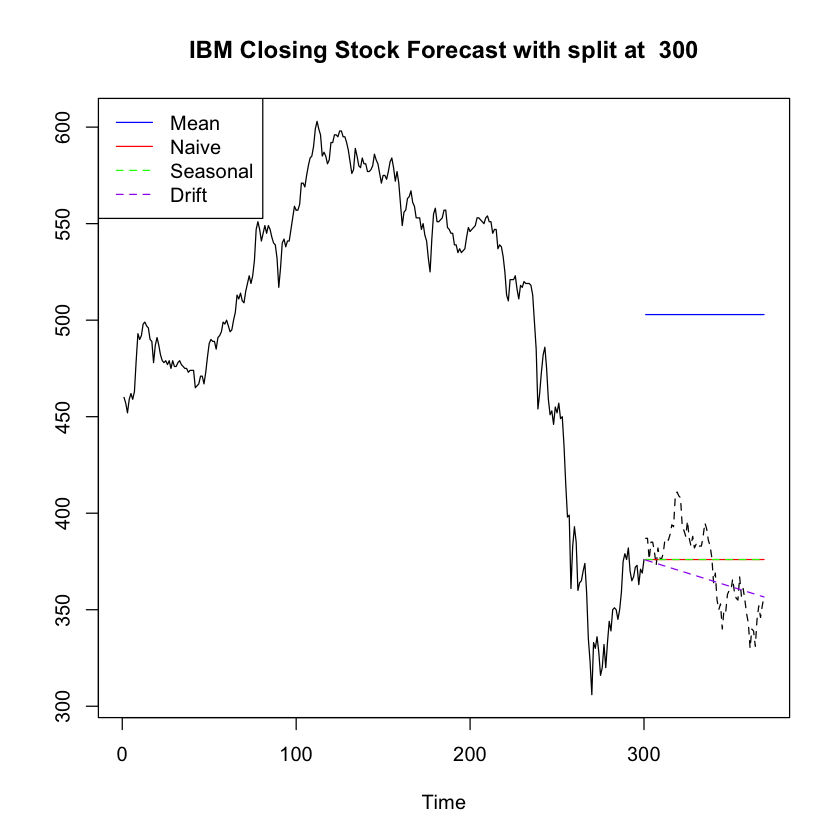

In [100]:
# I like generic reusable code

split = 300
title = paste("IBM Closing Stock Forecast with split at ", toString(split))
hsize = length(ds) - split

# split the set up along the user supplied number
train <- window(ds, start=1, end=split)
test <- window(ds, start=split + 1, end=length(ds))

# create the forecast objects
train_mean = meanf(train, h=hsize)
train_naive = naive(train, h=hsize)
train_seasonal = snaive(train, h=hsize)
train_drift = rwf(train, drift=TRUE, h=hsize)

# plot all results against each other
ts.plot(train
        , test
        , plot.type="single"
        , lty=c(1:2)
        , main=title
        )
lines(train_mean$mean, col="blue")
lines(train_naive$mean, col="red")
lines(train_seasonal$mean, col="green", lty=2)
lines(train_drift$mean, col="purple", lty=2)
legend("topleft", legend=c("Mean","Naive","Seasonal","Drift"), col=c("blue", "red", "green", "purple"), lty = c(1,1,2,2))

### Accuracy for 300/69 split

In [101]:
print("MEAN")
accuracy(train_mean, test)
print("NAIVE")
accuracy(train_naive, test)
print("SEASONAL")
accuracy(train_seasonal, test)
print("DRIFT")
accuracy(train_drift, test)

[1] "MEAN"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.660438e-14,73.61532,58.72231,-2.642058,13.03019,11.52098,0.9895779,NA
Test set,-1.306180e+02,132.12557,130.61797,-35.478819,35.47882,25.62649,0.9314689,19.05515


[1] "NAIVE"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.2809365,7.302815,5.09699,-0.08262872,1.115844,1.000000,0.1351052,NA
Test set,-3.7246377,20.248099,17.02899,-1.29391743,4.668186,3.340989,0.9314689,2.973486


[1] "SEASONAL"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.2809365,7.302815,5.09699,-0.08262872,1.115844,1.000000,0.1351052,NA
Test set,-3.7246377,20.248099,17.02899,-1.29391743,4.668186,3.340989,0.9314689,2.973486


[1] "DRIFT"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.870480e-14,7.297409,5.127996,-0.02530123,1.121650,1.006083,0.1351052,NA
Test set,6.108138e+00,17.066963,13.974747,1.41920066,3.707888,2.741765,0.9045875,2.361092


### 2c) for 250/159 split
This one is terrible, so it proves that choosing the right test/train split is very important

Warning message:
In xy.coords(x = matrix(rep.int(tx, k), ncol = k), y = x, log = log): NAs introduced by coercionWarning message:
In xy.coords(x, y): NAs introduced by coercion

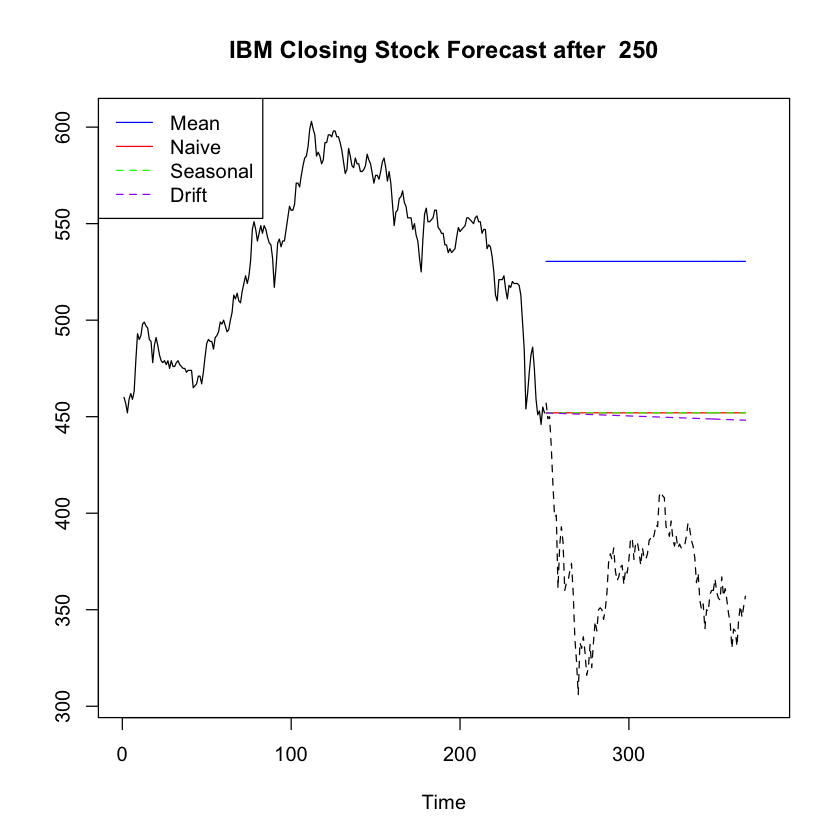

In [151]:
ds <- ibmclose
title = paste("IBM Closing Stock Forecast after ", toString(split))
split = 250
hsize = length(ds) - split

# split the set up along the user supplied number
train <- window(ds, start=1, end=split)
test <- window(ds, start=split + 1, end=length(ibm))

# create the forecast objects
train_mean = meanf(train, h=hsize)
train_naive = naive(train, h=hsize)
train_seasonal = snaive(train, h=hsize)
train_drift = rwf(train, drift=TRUE, h=hsize)

# plot results
ts.plot(train
        , test
        , plot.type="single"
        , xlim=c(1, 380)
        , lty=c(1:2)
        , main=title
        )
lines(train_mean$mean, col="blue")
lines(train_naive$mean, col="red")
lines(train_seasonal$mean, col="green", lty=2)
lines(train_drift$mean, col="purple", lty=2)
legend("topleft", legend=c("Mean","Naive","Seasonal","Drift"), col=c("blue", "red", "green", "purple"), lty = c(1,1,2,2))

## QUESTION 3

### Answer to 3a)
The data makes sense, we know the real calendar time frame of the data so we can see what was going on in the market. The biggest problem I see is that this represents a bunch of different geographical areas. We know that the housing market is very dependent on geo.

* Trend - There is no single upward or downward overall trend
* Seasonality - definitely see Seasonality, starts low goes up in the spring/summer and then back down.
* Cycle - don't really see any cycles

### Answer to 3b)
Using just the last 2 years of this dataset for test is probably a bit small, 10%. I would use a a little bit bigger set, 20%, just to make sure the testing isn't overfitting (is this even a thing in forecasting???)

### Answer to 3c)
Pretty obvious that Seasonal has the best fit since this data is very seasonal. The Accuracy numbers show it is the best of the 4 and a study of the residuals look good (mean near 0 and normally distributed).

In [102]:
ds <- hsales

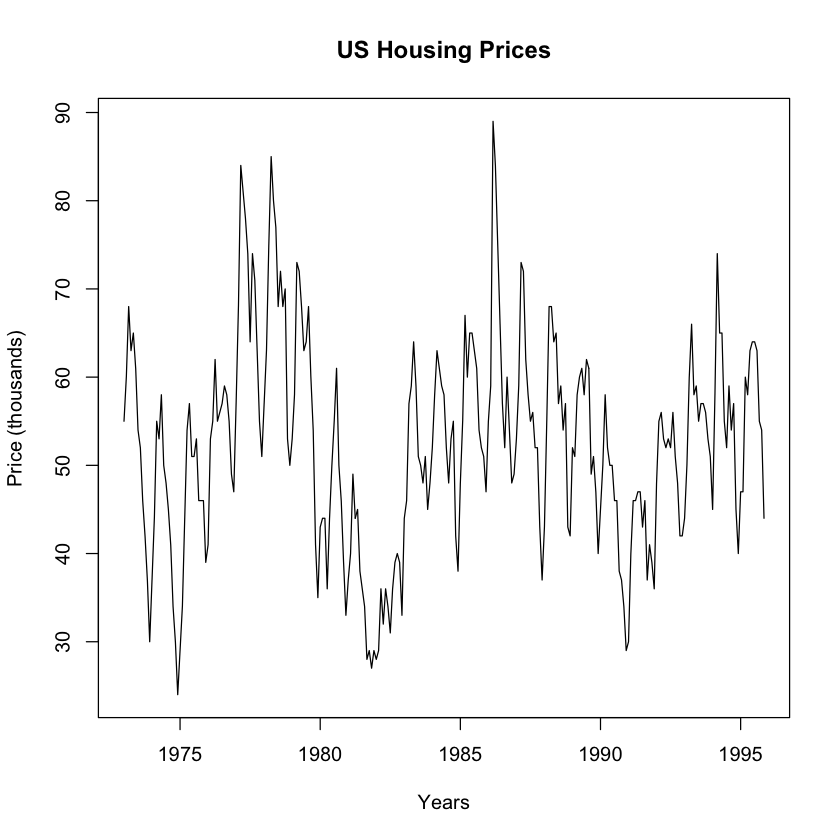

In [103]:
plot(ds, main="US Housing Prices", xlab="Years", ylab="Price (thousands)")

## Splitting & Forecasting

Warning message:
In xy.coords(x = matrix(rep.int(tx, k), ncol = k), y = x, log = log): NAs introduced by coercionWarning message:
In xy.coords(x, y): NAs introduced by coercion

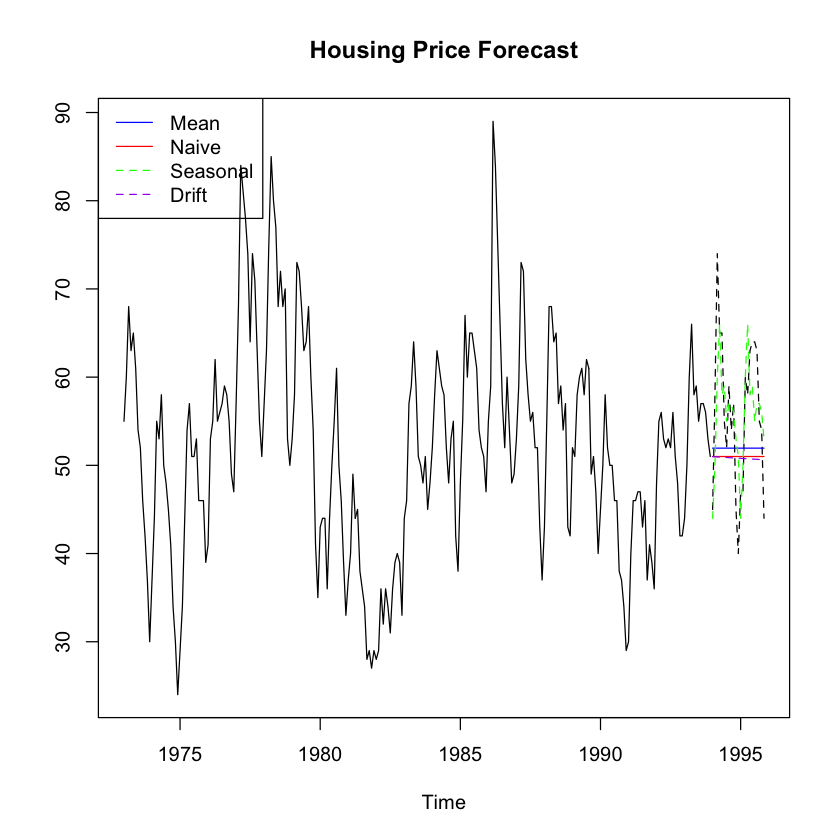

In [104]:
# SETUP TEST/TRAIN
title = paste("Housing Price Forecast")


# split the set up along the user supplied number
train <- window(ds, start=c(1973,1), end=c(1993,12))
test <- window(ds , start=c(1994,1))

hsize = length(test)

# create the forecast objects
train_mean = meanf(train, h=hsize)
train_naive = naive(train, h=hsize)
train_seasonal = snaive(train, h=hsize)
train_drift = rwf(train, drift=TRUE, h=hsize)

# plot all results against each other
ts.plot(train
        , test
        , plot.type="single"
        , lty=c(1:2)
        , main=title
        )
lines(train_mean$mean, col="blue")
lines(train_naive$mean, col="red")
lines(train_seasonal$mean, col="green", lty=2)
lines(train_drift$mean, col="purple", lty=2)
legend("topleft", legend=c("Mean","Naive","Seasonal","Drift"), col=c("blue", "red", "green", "purple"), lty = c(1,1,2,2))

## Plot just the forecast models vs the Actual to see how they did

Warning message:
In xy.coords(x = matrix(rep.int(tx, k), ncol = k), y = x, log = log): NAs introduced by coercionWarning message:
In xy.coords(x, y): NAs introduced by coercion

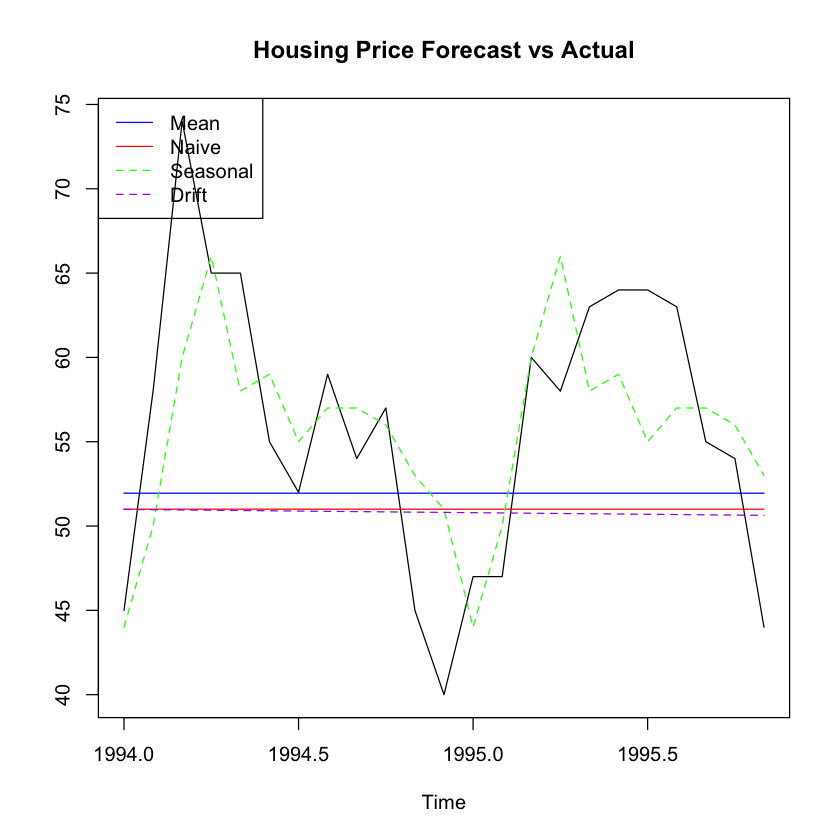

In [105]:
ts.plot(test
        , plot.type="single"
        , main="Housing Price Forecast vs Actual"
        )
lines(train_mean$mean, col="blue")
lines(train_naive$mean, col="red")
lines(train_seasonal$mean, col="green", lty=2)
lines(train_drift$mean, col="purple", lty=2)
legend("topleft", legend=c("Mean","Naive","Seasonal","Drift"), col=c("blue", "red", "green", "purple"), lty = c(1,1,2,2))

### Residuals of Seasonal Forecast model
There doesn't seem to be any correlation in the residuals.

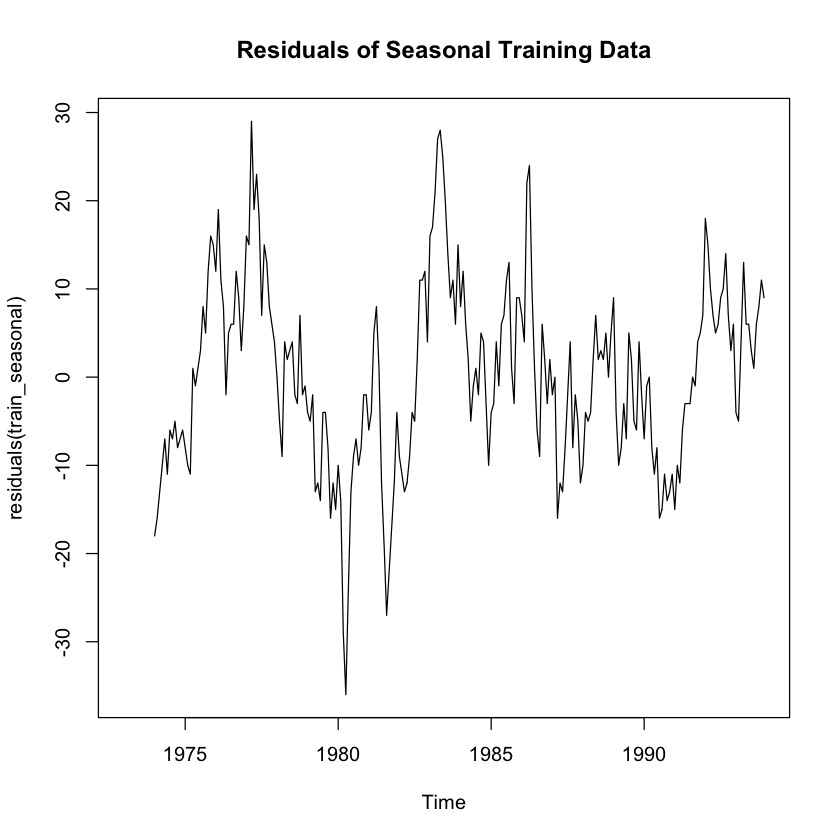

In [106]:
plot(residuals(train_seasonal), main="Residuals of Seasonal Training Data")

### Histogram of Residuals of Seasonal
The mean of the residuals is darn close to 0 and close to normally distrubuted

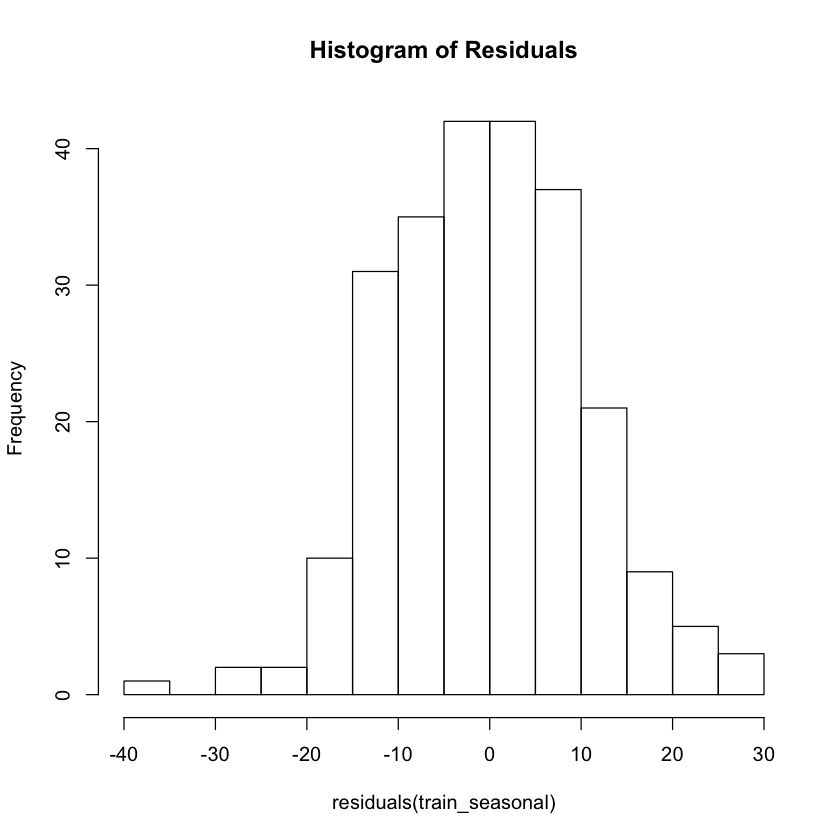

In [107]:
hist(residuals(train_seasonal), nclass="FD", main="Histogram of Residuals")

In [108]:
print("MEAN")
accuracy(train_mean, test)
print("NAIVE")
accuracy(train_naive, test)
print("SEASONAL")
accuracy(train_seasonal, test)
print("DRIFT")
accuracy(train_drift, test)

[1] "MEAN"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.480763e-15,12.138802,9.498898,-6.120182,20.30851,1.119163,0.8661515,NA
Test set,4.051587e+00,9.216133,7.850759,5.074990,13.75973,0.924979,0.5095178,1.13105


[1] "NAIVE"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.01593625,6.289813,4.988048,-0.7800232,9.880157,0.5876934,0.1829708,NA
Test set,5.00000000,9.670664,8.304348,6.8080182,14.381673,0.9784210,0.5095178,1.179633


[1] "SEASONAL"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.1375000,10.576113,8.4875,-2.1016380,17.63375,1.0000000,0.838108,NA
Test set,0.3043478,6.160886,5.0000,-0.7312374,9.12828,0.5891016,0.224307,0.8031005


[1] "DRIFT"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.377739e-15,6.289793,4.987730,-0.7474544,9.87819,0.5876560,0.1829708,NA
Test set,5.191235e+00,9.761548,8.393037,7.1599507,14.50303,0.9888703,0.5083059,1.188562


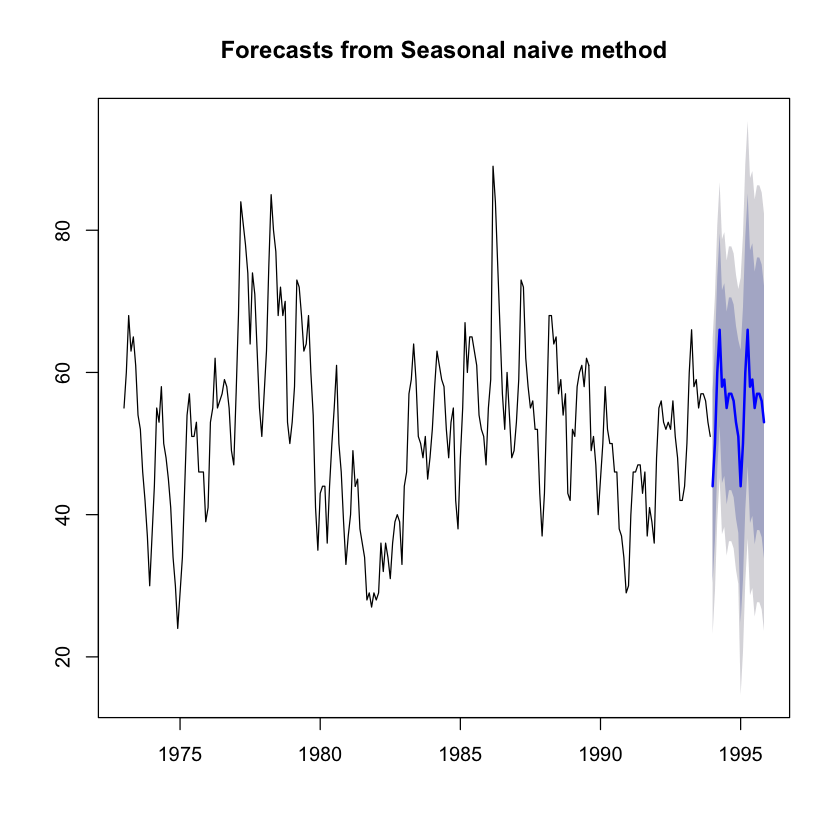

In [109]:
plot.forecast(train_seasonal)

## QUESTION 4

### ANSWER TO 4a)
I found some data on the number of pigs slaughter in Victoria. It is silly data, but since I did used to work for a Pig processing company I kind of find this data interesting and want to see what the forecasting looks like. The data is Month/Year. It took me about an hour to figure out how to import it correctly. I ended up using the zoo library and a function called as.yearmon to get it to finally work.

* Trend - for the most part increases, except for a big down swing from 1985 to 1988 (not due to swine flu)
* Seasonality - definitely
* Cycle - there could be a cycle in here, would be able to see if I had more data

### Answer to 4b)
I choose to split it at 1992, which is a little around 80/20 split. I choose this because it seems to be the commonly suggested split (saw it in our text as well).

### Answer to 4c)
Looks like Naive is the best this time, it has the best accuracy numbers MAE & MAPE. The residuals are scewed left in the histogram so, this probably isn't the best fit.

### Answer to 4d)
This data is not any different in nature from the data used in 2 & 3. It is very basic and simple data. In fact, it is very much like the data we used in class, AirPassengers.

In [110]:
# read in the csv file
pigs <- read.csv("pigs.csv", sep=",", header=TRUE)

# use zoo to convert the date "YYYY-MM" to a date
pigzoo <- read.zoo(pigs, sep=",", FUN=as.yearmon)

# us ts to convert the zoo object to ts object using the correct intervals
ds = ts(pigzoo, frequency=12, start=c(1980,1), end=c(1995, 8))

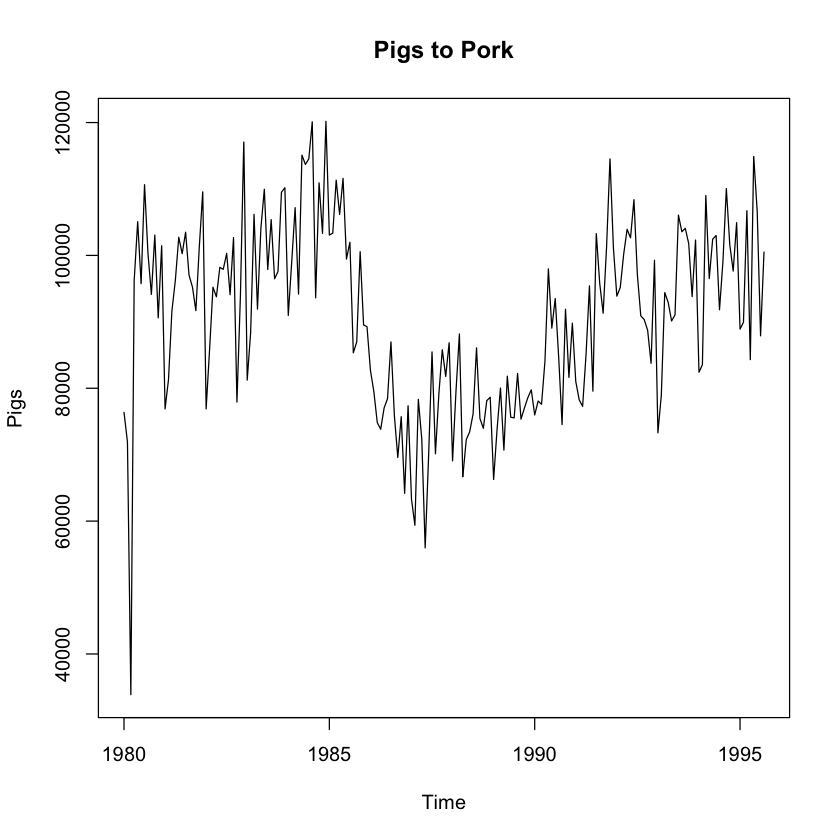

In [111]:
plot(ds, main="Pigs to Pork", xlab="Time", ylab="Pigs")

## Splitting & Forecasting

Warning message:
In xy.coords(x = matrix(rep.int(tx, k), ncol = k), y = x, log = log): NAs introduced by coercionWarning message:
In xy.coords(x, y): NAs introduced by coercion

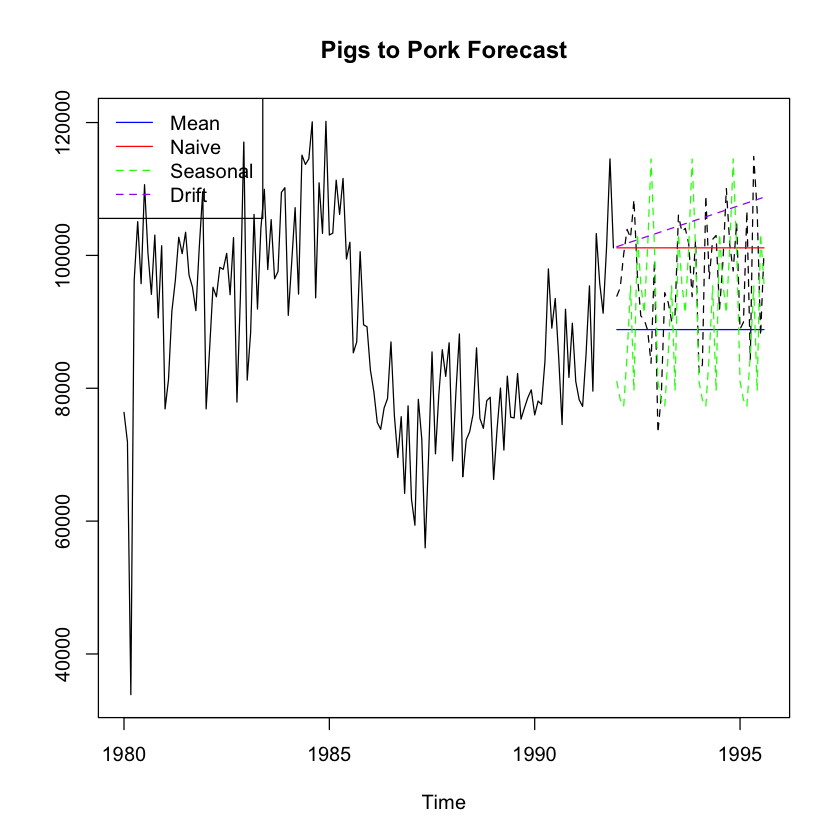

In [112]:
# SETUP TEST/TRAIN
title = paste("Pigs to Pork Forecast")

# split the set up along the user supplied number
train <- window(ds, start=c(1980,1), end=c(1991,12))
test <- window(ds, start=c(1992,1))

hsize = length(test)

# create the forecast objects
train_mean = meanf(train, h=hsize)
train_naive = naive(train, h=hsize)
train_seasonal = snaive(train, h=hsize)
train_drift = rwf(train, drift=TRUE, h=hsize)

# plot all results against each other
ts.plot(train
        , test
        , plot.type="single"
        , lty=c(1:2)
        , main=title
        )
lines(train_mean$mean, col="blue")
lines(train_naive$mean, col="red")
lines(train_seasonal$mean, col="green", lty=2)
lines(train_drift$mean, col="purple", lty=2)
legend("topleft", legend=c("Mean","Naive","Seasonal","Drift"), col=c("blue", "red", "green", "purple"), lty = c(1,1,2,2))

In [113]:
print("MEAN")
accuracy(train_mean, test)
print("NAIVE")
accuracy(train_naive, test)
print("SEASONAL")
accuracy(train_seasonal, test)
print("DRIFT")
accuracy(train_drift, test)

[1] "MEAN"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-6.463447e-12,14600.60,12175.042,-3.192373,14.72943,1.2242300,0.6203379,NA
Test set,7.724604e+03,11853.96,9896.806,7.154070,9.90281,0.9951478,0.1427674,0.9884602


[1] "NAIVE"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,173.1538,12683.02,9582.706,-1.140985,11.431067,0.9635644,-0.4274190,NA
Test set,-4581.8409,10091.59,7890.614,-5.708369,8.769422,0.7934204,0.1427674,0.8693331


[1] "SEASONAL"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,183.1515,13420.73,9945.061,-0.852949,11.62299,1.000000,0.5368926,NA
Test set,5485.0000,14792.86,11640.091,4.945537,11.86428,1.170439,0.1875218,1.229767


[1] "DRIFT"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.238943e-12,12681.84,9569.387,-1.341950,11.42934,0.9622251,-0.4274190,NA
Test set,-8.477802e+03,12259.75,9552.495,-9.742164,10.72182,0.9605266,0.1196267,1.040956


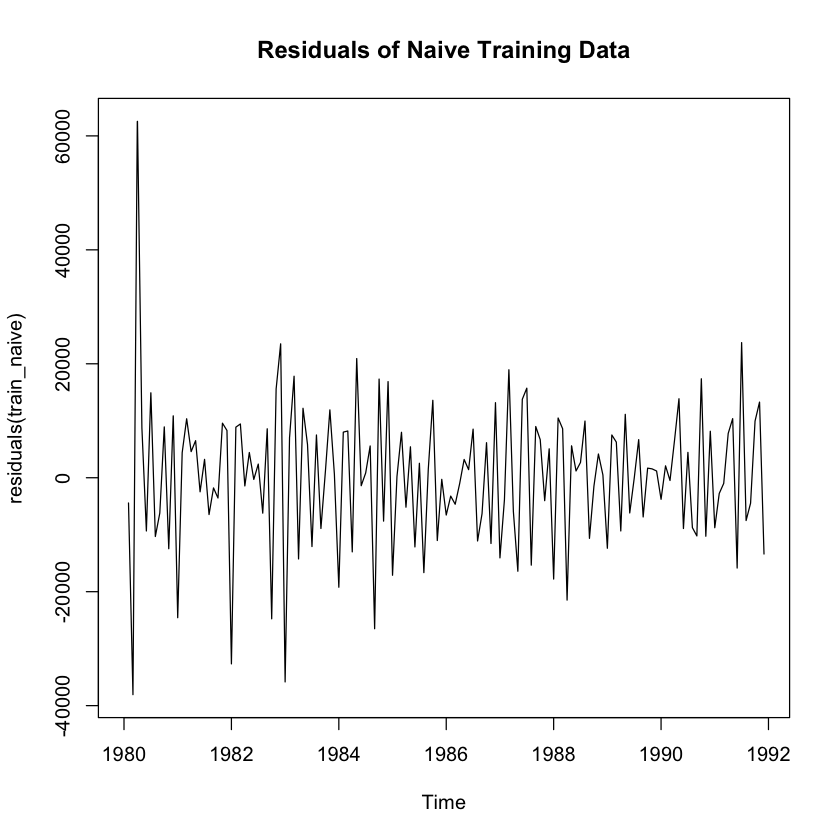

In [114]:
plot(residuals(train_naive), main="Residuals of Naive Training Data")

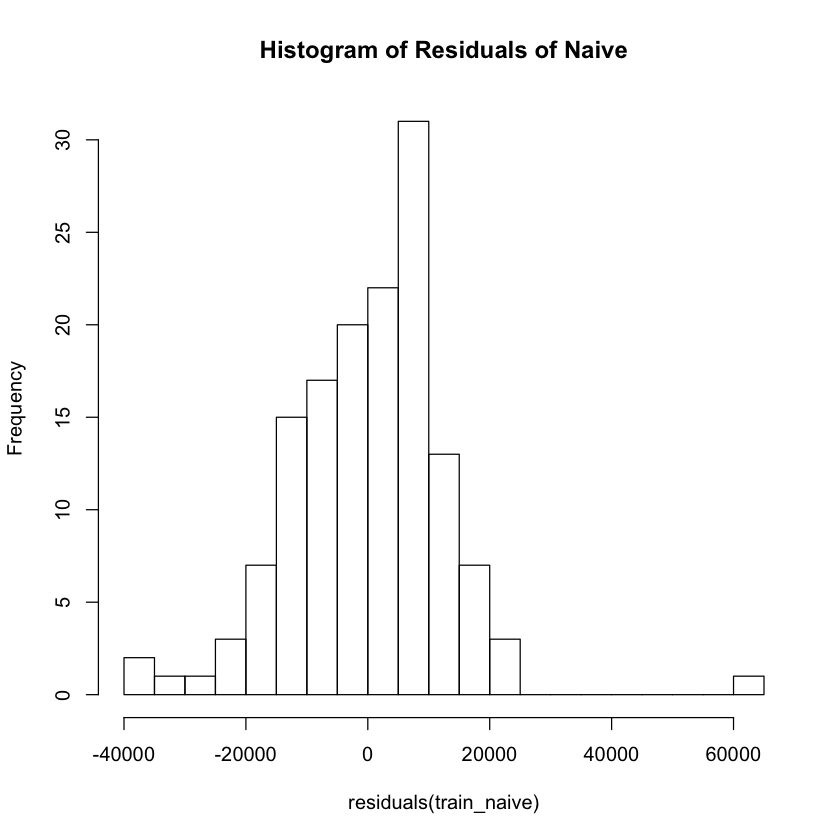

In [115]:
hist(residuals(train_naive), nclass="FD", main="Histogram of Residuals of Naive")

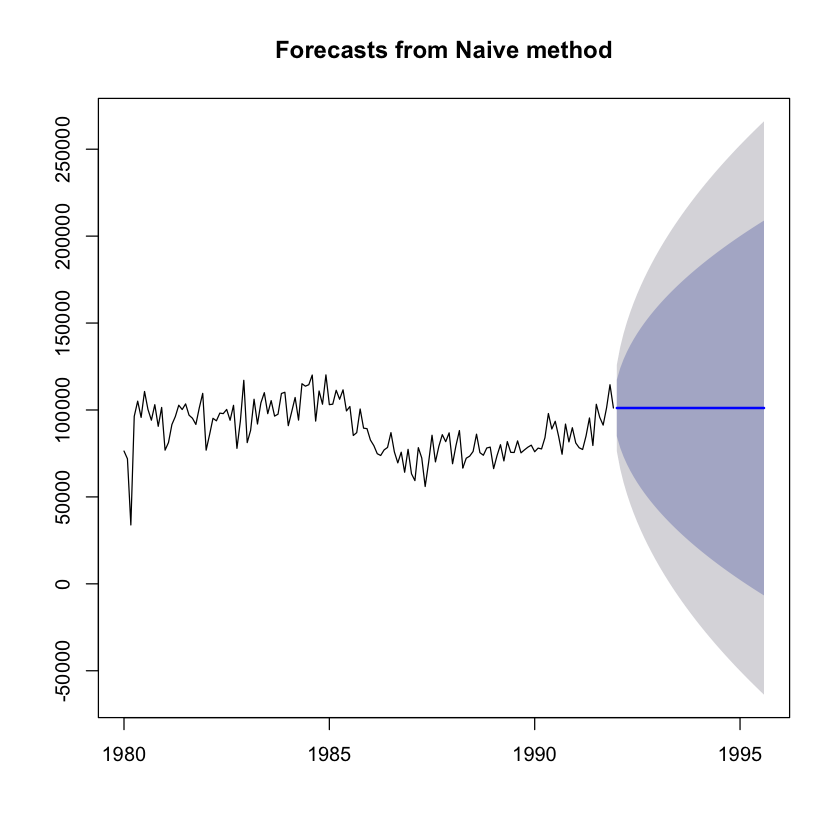

In [116]:
plot.forecast(train_naive)